# Simple Neural Networks on MNIST data set

## Import packages

In [46]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [47]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [49]:
X_train[0].shape

(28, 28)

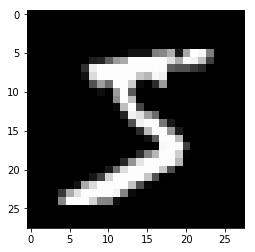

In [50]:
plt.imshow(X_train[0],cmap='gray')

In [51]:
y_train[0]

5

## Preprocessing the image data

In [52]:
image_height,image_width = 28,28

In [53]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [54]:
print(X_train[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [55]:
X_train /= 255.0
X_test /= 255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [56]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [57]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

In [58]:
model = Sequential()

In [59]:
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10,activation='softmax'))

## Compile the model

In [60]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [65]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 360s - loss: 0.1841 - acc: 0.9450 - val_loss: 0.1021 - val_acc: 0.9679
Epoch 2/20
60000/60000 [==============================] - 349s - loss: 0.0806 - acc: 0.9755 - val_loss: 0.0755 - val_acc: 0.9751
Epoch 3/20
60000/60000 [==============================] - 306s - loss: 0.0580 - acc: 0.9819 - val_loss: 0.0784 - val_acc: 0.9750
Epoch 4/20
60000/60000 [==============================] - 288s - loss: 0.0422 - acc: 0.9865 - val_loss: 0.0779 - val_acc: 0.9781
Epoch 5/20
60000/60000 [==============================] - 275s - loss: 0.0339 - acc: 0.9894 - val_loss: 0.1044 - val_acc: 0.9739
Epoch 6/20
60000/60000 [==============================] - 279s - loss: 0.0272 - acc: 0.9920 - val_loss: 0.0745 - val_acc: 0.9803
Epoch 7/20
60000/60000 [==============================] - 289s - loss: 0.0277 - acc: 0.9917 - val_loss: 0.0965 - val_acc: 0.9801
Epoch 8/20
60000/60000 [=======================

## What is the accuracy of the model?

### Plot the accuracy of the training model

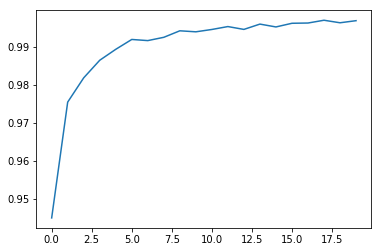

In [66]:
plt.plot(history.history['acc'])

### Plot the accuracy of training and validation set

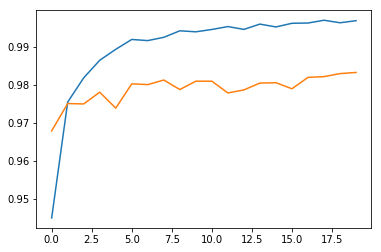

In [67]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

### Accuracy of training and validation with loss

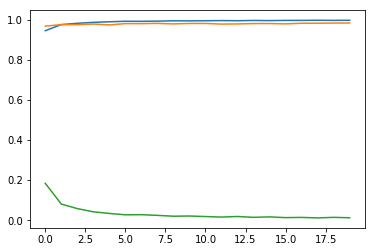

In [68]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])

## Run a prediction

In [69]:
score = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 8s     


In [70]:
score


[0.10995577097022702, 0.9833]